# IEEE Signals 101

### Plotting basic signals

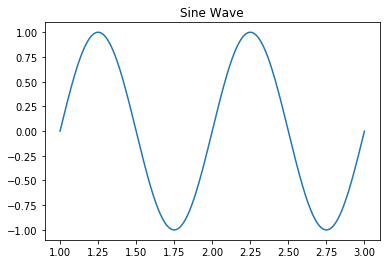

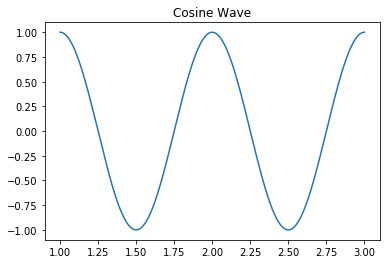

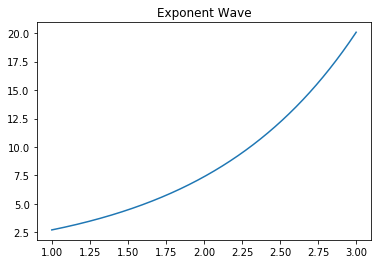

In [13]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(1,3,1/8000.0)
sin_wave = np.sin(2*n*np.pi)
plt.title('Sine Wave')
plt.plot(n,sin_wave)
plt.show()

cos_wave = np.cos(2*n*np.pi)
plt.title('Cosine Wave')
plt.plot(n,cos_wave)
plt.show()

exp_wave = np.exp(n)
plt.title('Exponent Wave')
plt.plot(n,exp_wave)
plt.show()



### Synthesizing an Audio Signal

In [23]:
import numpy as np
import wave
import struct
import matplotlib.pyplot as plt
 
# set frequency of the wave 
frequency = 500
 
num_samples = 8000     

# The sampling rate of the analog to digital convert
sampling_rate = 8000.0   
 
amplitude = 16000
 
# the sound file we are writing to    
file = "test.wav"  


sine_wave = [np.sin(2 * np.pi * frequency * x/sampling_rate) for x in range(num_samples)]


sine_wave=np.array(sine_wave)    #convert to a numpy array


nframes=num_samples
 
comptype="NONE"
 
compname="not compressed"
 
nchannels=1


# 2bytes = 16 bits
sampwidth=2 

wav_file=wave.open(file, 'w')
 
wav_file.setparams((nchannels, sampwidth, int(sampling_rate), nframes,comptype, compname))

for s in sine_wave:
   wav_file.writeframes(struct.pack('h', int(s*amplitude)))

struct.pack('h', int(s*amplitude))

print("Listen to the audio 'test.wav'")

IPython.display.Audio(sine_wave,"test.wav")

Listen to the audio 'test.wav'


### Moving from the time domain to the frequency domain

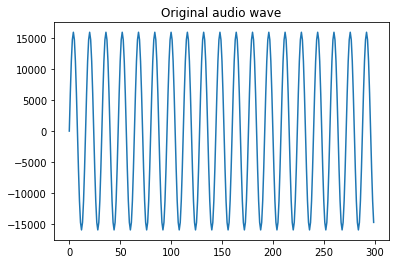

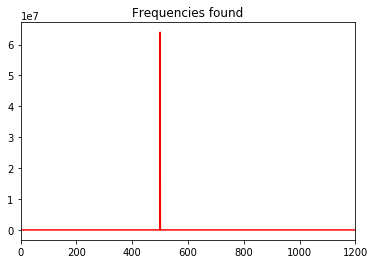

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.io.wavfile as wav

r, data = wav.read('test.wav', mmap=False)

# fast fourier transform of the data signal
data_fft =  np.fft.fft(data)  


# the np.fft function returns complex values
# we take the absolute value since we are dealing with reals
frequencies = np.abs(data_fft) 

plt.title("Original audio wave") 
plt.plot(data[:300])
plt.show() 

 
plt.title("Frequencies found") 
plt.plot(frequencies,'r')
 
plt.xlim(0,1200)
 
plt.show()

### Let's synthesize a signal that's more complicated

In [24]:
import numpy as np
import wave
import struct
import matplotlib.pyplot as plt
 
 
frequency1 = 500
frequency2 = 1000    
 
num_samples = 8000     
 
sampling_rate = 8000.0   
 
amplitude = 16000
 
file = "test2.wav"

sine_wave1 = [np.sin(2 * np.pi * frequency1 * x/sampling_rate) for x in range(num_samples)]

sine_wave2 = [np.sin(2 * np.pi * frequency2 * x/sampling_rate) for x in range(num_samples)]


sine_wave1 = np.array(sine_wave1)    

sine_wave2 = np.array(sine_wave2)

sine_final = sine_wave1 + sine_wave2


nframes=num_samples
 
comptype="NONE"
 
compname="not compressed"
 
nchannels=1
 
sampwidth=2 

wav_file=wave.open(file, 'w')
 
wav_file.setparams((nchannels, sampwidth, int(sampling_rate), nframes,comptype, compname))

for s in sine_final:
   wav_file.writeframes(struct.pack('h', int(s*amplitude)))


struct.pack('h', int(s*amplitude))
print("Listen to test2.wav")

IPython.display.Audio(sine_final,'test2.wav')

Listen to test2.wav


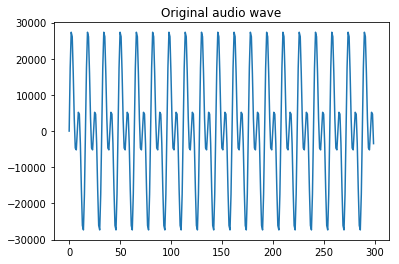

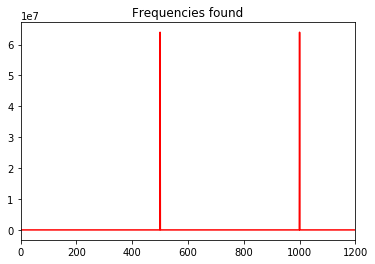

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.io.wavfile as wav

r, data = wav.read('test2.wav', mmap=False)

# fast fourier transform of the data signal
data_fft =  np.fft.fft(data)  


# the np.fft function returns complex values
# we take the absolute value since we are dealing with reals
frequencies = np.abs(data_fft) 

plt.title("Original audio wave") 
plt.plot(data[:300])
plt.show() 

 
plt.title("Frequencies found") 
plt.plot(frequencies,'r')
 
plt.xlim(0,1200)
 
plt.show()

### Creating music!

In [7]:
import numpy as np
from numpy import linspace,sin,pi,int16
from scipy.io.wavfile import write
from pylab import plot,show,axis
import IPython



# tone synthesis
def note(freq, len, amp=1, rate=44100):
    t = linspace(0,len,len*rate)
    data = sin(2*pi*freq*t)*amp
    # two byte integers
    return data.astype(int16) 
 
 


# all tones, 1 second each, 44100 samples per second
Atone = note(440,1,amp=10000)
Btone = note(494,1,amp=10000)
Ctone = note(523,1,amp=10000)
Dtone = note(587,1,amp=10000)
Etone = note(659,1,amp=10000)
Ftone = note(698,1,amp=10000)
Gtone = note(784,1,amp=10000)
A2tone = note(880,1,amp=10000)
Blank = note(0,0.10,amp=10000)


Octave = np.concatenate((Atone,Btone,Ctone,Dtone,Etone,Ftone,Gtone,A2tone))

Song = np.concatenate((Etone,Blank,Etone,Blank,Ftone,Blank,Gtone,Blank,Gtone,Blank,Ftone,Blank,Etone,Blank,Dtone,Blank,Ctone,Blank,Ctone,Blank,Dtone,Blank,Etone,Blank,Etone,Blank,Dtone,Blank,Dtone))


# writing the sound to a file

write('Atone.wav',44100,Atone) 
write('Btone.wav',44100,Btone)
write('Ctone.wav',44100,Ctone)
write('Dtone.wav',44100,Dtone)
write('Etone.wav',44100,Etone)
write('Ftone.wav',44100,Ftone)
write('Gtone.wav',44100,Gtone)

write('Octave.wav',44100,Octave)
write('Song.wav',44100,Song)
IPython.display.Audio(Octave,'Octave.wav')


E:\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


In [14]:
IPython.display.Audio(Song,'Song.wav')